## Drug Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('https://drive.google.com/uc?id=1xq4PY4lbJgVGs8IIabCaIenWZfXaAp0M')

## Exploaratory Data Analysis

In [3]:
dataset.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
dataset.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
dataset.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
dataset.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [7]:
duplicate_rows = dataset[dataset.duplicated()]
dataset = dataset.drop_duplicates()

In [8]:
dataset.count()

Age            200
Sex            200
BP             200
Cholesterol    200
Na_to_K        200
Drug           200
dtype: int64

In [9]:
num_cols=['Age','Na_to_K']
cat_cols = ['Sex','BP','Cholesterol']

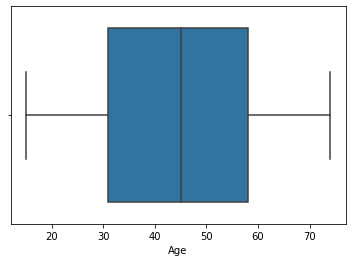

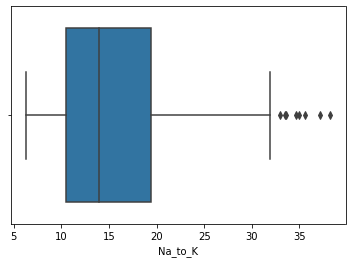

In [10]:
for i in range(len(num_cols)):
    plt.figure(i)
    sns.boxplot(x=dataset[num_cols[i]])

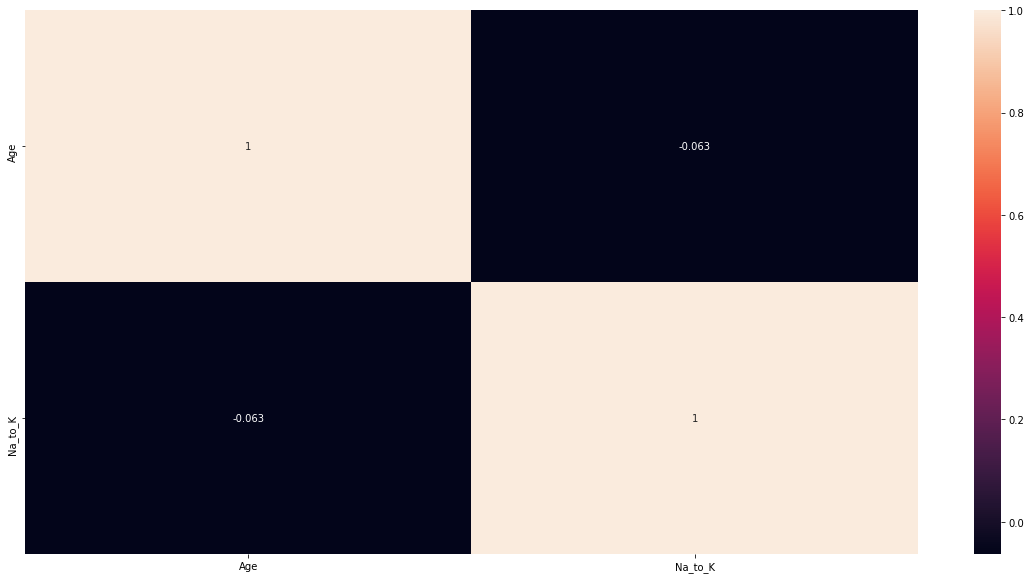

In [11]:
plt.figure(figsize=(20,10))
c= dataset.corr()
sns.heatmap(c,annot=True)

In [12]:
c

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


In [13]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

## Model and Pipelines

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
from xgboost import XGBClassifier

In [16]:
numerical_transformer = Pipeline(steps=[
                                        ('imputer',SimpleImputer(strategy='mean')),
                                        ('scaler',StandardScaler())   
])

In [17]:
categorical_transformer = Pipeline(steps=[
                                          ('imputer',SimpleImputer(strategy='most_frequent')),
                                          ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [18]:
preprocessor = ColumnTransformer(transformers=[
                                               ('numerical',numerical_transformer,num_cols),
                                               ('categorical',categorical_transformer,cat_cols)
])

In [19]:
model = Pipeline(steps=[
                        ('preprocessor',preprocessor),
                        ('model',XGBClassifier(n_estimators=50))
])

In [20]:
model

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numerical',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                         

## Cross validation score

In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y,
                              cv=10,
                              scoring='accuracy')

In [22]:
scores.mean()

0.985